In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.table import Table, join, Column
% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [23]:
fname = '../data/haloC4.csv'
data = Table.read(fname,format='ascii')
shortcad = open('../data/shortcad.txt','r').read().split('\n')

In [3]:
data

Name,Vmag,Sp. Type,EPIC ID,RA (J2000),Dec (J2000),MASK,Comments
str8,float64,str12,int64,str14,int64,str7,str17
Alcyone,2.986,B7III,200007767,--,--,LC Halo,\citet{White2017}
Atlas,3.763,B8III,200007768,--,--,LC Halo,\citet{White2017}
Electra,3.851,B6IIIe,200007769,--,--,LC Halo,\citet{White2017}
Merope,4.305,--,200007770,B6IVe,--,LC Halo,\citet{White2017}
Maia,4.305,--,200007771,B8III,--,LC Halo,\citet{White2017}
Taygeta,4.448,--,200007772,B6IV,--,LC Halo,\citet{White2017}
Pleione,5.192,--,200007773,B8Vne,--,LC Halo,\citet{White2017}
gam Tau,3.474,--,200007765,G9.5IIIabCN0.5,--,LC Halo,--
del1 Tau,3.585,G9.5IIICN0.5,200007766,--,--,LC Halo,--


In [37]:
campaigns = range(4,19)
objective = 'tv'
lag = 10
template = "wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -R 'index*' -erobots=off"

f = open('../data/download_halo.txt','w')
h = open('../scripts/sbatch_k2sc_all.txt','w')
h.write('python correct_halo.py -c 6 -name Spica --objective %s &> Spica_output.txt\n' % objective) # do Spica manually
k = open('../reduced/sbatch_halo_all.txt','w')
short = open('../reduced/short.txt','w')
for campaign in campaigns:
    if campaign == 5:
        continue
    print('Campaign',campaign,'\n')
    g = open('../reduced/halo_commands_c%d.txt' % campaign,'w')
    fname = '../data/haloC%d.csv' % campaign
    print(fname)
    data = Table.read(fname,format='ascii')
    
    for star in data:
        epic = star['EPIC ID']
        if 'alo' in star['MASK']:
            print(star['Name'],star['EPIC ID'],star['MASK'])
            if campaign == 11:
                campaign = 111 # no 112
            fname = 'ktwo%d-c%02d_lpd-targ.fits.gz' % (epic,campaign)
            shortfname = fname.replace('lpd','spd')
            if campaign in [9, 10]:
                for j in [1,2]:
                    fname = 'ktwo%d-c%d%d_lpd-targ.fits.gz' % (epic,campaign,j)
                    url = 'https://archive.stsci.edu/pub/k2/target_pixel_files/c%d%d/%s00000/%s000/%s' % (campaign,j,str(epic)[:4],str(epic)[4:6],fname)
                    command = template+' '+url
                    f.write(command+'\n')
                    halocommand = 'halo %s --data-dir ../data/ --save-dir ../reduced/c%d%d/ --name %s -c %d%d --thresh 0.5 --objective %s --lag %d --do-plot\n' % (fname,campaign,j,star['Name'].replace(' ','_'),campaign,j,objective,lag)
                    if campaign ==9:
                        halocommand = 'halo %s --data-dir ../data/ --save-dir ../reduced/c%d%d/ --name %s -c %d%d --thresh 0.5 --objective %s --lag %d --deathstar --do-plot\n' % (fname,campaign,j,star['Name'].replace(' ','_'),campaign,j,objective,lag)
                    g.write(halocommand)
                    k.write(halocommand)
                    if shortfname in shortcad:
                        shortcommand = 'halo %s --data-dir ../data/ --save-dir ../reduced/short/ --name %s -c %d%d --thresh 0.5 --objective %s --lag 300 --deathstar --do-plot\n' % (shortfname,star['Name'].replace(' ','_'),campaign,j,objective)
                        print(short.write(shortcommand))

                    k2sc_command = 'python correct_halo.py -c %d%d -name %s --objective %s &> %s_output%d.txt' % (campaign,j,star['Name'].replace(' ','_'),objective,star['Name'].replace(' ','_'),j)
                    h.write(k2sc_command+'\n')
            else:
                url = 'https://archive.stsci.edu/pub/k2/target_pixel_files/c%d/%s00000/%s000/%s' % (campaign,str(epic)[:4],str(epic)[4:6],fname)
                command = template+' '+url
                f.write(command+'\n')
                k2sc_command = 'python correct_halo.py -c %d -name %s --objective %s &> %s_output.txt' % (campaign,star['Name'].replace(' ','_'),objective,star['Name'].replace(' ','_'))
                h.write(k2sc_command+'\n')

#             print(command)
                halocommand = 'halo %s --data-dir ../data/ --save-dir ../reduced/c%d/ --name %s -c %d --thresh 0.5 --objective %s --lag %d --do-plot\n' % (fname,campaign,star['Name'].replace(' ','_'),campaign,objective,lag)
                g.write(halocommand)
                k.write(halocommand)
                if shortfname in shortcad:
                    shortcommand = 'halo %s --data-dir ../data/ --save-dir ../reduced/short/ --name %s -c %d --thresh 0.5 --objective %s --lag 300 --do-plot\n' % (shortfname,star['Name'].replace(' ','_'),campaign,objective)
                    print(short.write(shortcommand))

#             print(halocommand)
    g.close()
    print('\n')
f.close()
h.close()
k.close()
short.close()

Campaign 4 

../data/haloC4.csv
Alcyone 200007767 LC Halo
Atlas 200007768 LC Halo
Electra 200007769 LC Halo
Merope 200007770 LC Halo
Maia 200007771 LC Halo
Taygeta 200007772 LC Halo
Pleione 200007773 LC Halo
gam Tau 200007765 LC Halo
del1 Tau 200007766 LC Halo


Campaign 6 

../data/haloC6.csv


Campaign 7 

../data/haloC7.csv
Ascella 200062593 Halo
Albaldah 200062592 Halo
tau Sgr 200062591 Halo
ksi2 Sgr 200062590 Halo
omi Sgr 200062589 Halo
52 Sgr 200062585 Halo
Ainalrami 200062588 Halo
psi Sgr 200062584 Halo
43 Sgr 200062587 Halo
nu2 Sgr 200062586 Halo


Campaign 8 

../data/haloC8.csv
eps Psc 200068392 Halo
Revati 200068393 Halo
80 Psc 200068394 Halo
42 Cet 200068399 Halo
33 Cet 200068395 Halo
60 Psc 200068396 Halo
73 Psc 200068397 Halo
WW Psc 200068398 Halo
HR 243 200068400 Halo
HR 161 200068401 Halo


Campaign 9 

../data/haloC9.csv
HR 6766 200069361 Halo
HR 6842 200069360 Halo
4 Sgr 200069357 Halo
11 Sgr 200069358 Halo
7 Sgr 200069362 Halo
15 Sgr 200069359 Halo
HR 6838 200069363 

In [29]:
fname.replace('lpd','lpd')

'ktwo200233194-c18_lpd-targ.fits.gz'

### Now let us make some tables for the paper


In [8]:
data[['Halo' in mask for mask in data['MASK']]]

Name,Vmag,Sp. Type,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],MASK,Investigation IDs,TPF,LC Halo Lightcurve,Lightcurve Image,Weight Image,Flux Image,Project,Contact,Publication,Comments
str8,float64,str12,int64,float64,float64,str7,str87,int64,int64,int64,int64,int64,int64,int64,int64,str7
gam Cnc,4.652,A1IV,200233186,130.8214508,21.46850022,Halo,GO18038|GO18051|GAMMA_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5
zet Cnc,4.67,F8V+G0V,200233643,123.0530265,17.64776708,Halo,GO18038|GO18051|ZETA_CANCRI-SC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5
eta Cnc,5.325,K3III,200233187,128.1770667,20.44116292,Halo,GO18038|GO18051|ETA_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16"
60 Cnc,5.44,K5III,200233188,133.98145,11.62602,Halo,GO18051|GO18068|60_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16"
49 Cnc,5.66,A1VpHgMnSiEu,200233189,131.1876504,10.08166753,Halo,GO18049|GO18051|GO18067|49_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5
HR 3264,5.798,K1III,200233190,125.08739,20.74772,Halo,GO18051|GO18068|HR_3264-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5
50 Cnc,5.885,A1Vp,200233191,131.7334112,12.10995057,Halo,GO18038|GO18049|GO18051|50_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16"
29 Cnc,5.948,A5V,200233192,127.1555775,14.21082345,Halo,GO18049|GO18051|29_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5
HR 3222,6.047,G8III,200233193,123.2488715,16.51431877,Halo,GO18051|HR_3222-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5


In [9]:
from astroquery.simbad import Simbad
from astropy import coordinates as coord
from astropy import units as u



In [10]:
Simbad.reset_votable_fields()
Simbad.add_votable_fields('sptype')
sim = Simbad.query_objects(data['Name'])
data['SpType'] = sim['SP_TYPE']


In [11]:
from astropy.io import ascii
names = ['Name','EPIC','RA (J2000)','Dec (J2000)','Spectral','V']
units = ['', '', '(deg)','(deg)','Type','mag']

latexdict = ascii.latex.latexdicts['AA'].copy()
latexdict['tabletype']= 'table*'
latexdict['units'] = dict(zip(names,units))


In [12]:
latexdict

{'tabletype': 'table*',
 'header_start': '\\hline \\hline',
 'header_end': '\\hline',
 'data_end': '\\hline',
 'units': {'Name': '',
  'EPIC': '',
  'RA (J2000)': '(deg)',
  'Dec (J2000)': '(deg)',
  'Spectral': 'Type',
  'V': 'mag'}}

In [13]:
to_write = data[['Halo' in mask for mask in data['MASK']]]['Name','EPIC ID','RA (J2000) [deg]','Dec (J2000) [deg]','SpType','Vmag']
to_write.rename_column('EPIC ID','EPIC')
to_write.rename_column('RA (J2000) [deg]','RA (J2000)')
to_write.rename_column('Dec (J2000) [deg]','Dec (J2000)')
to_write.rename_column('SpType','Spectral')
to_write.rename_column('Vmag','V')
to_write['Campaign'] = campaign*np.ones(len(to_write),dtype='int')


caption = r"All stars observed with halo photometry in Campaign %d." % campaign 
to_write.write('../paper/table_c%d.tex' % campaign,format='latex',latexdict=latexdict,caption=caption+'\label{table_c%d}' % campaign,overwrite=True)
print('Written %s' % '../paper/table_c%d.tex' % campaign)


Written ../paper/table_c18.tex


In [14]:
from astropy.table import vstack, hstack
simgreek = ['alf','bet','gam','del','eps','zet','eta','tet','iot','kap','lam','mu','nu','ksi','omi','pi','rho','sig','tau','ups','phi','khi','psi','ome']
latexgreek = ['\\alpha', '\\beta', '\\gamma','\\delta','\\epsilon','\\zeta','\\eta','\\theta','\\iota','\\kappa','\\lambda','\\mu','\\nu','\\xi','o','\\pi','\\rho','\\sigma','\\tau','\\upsilon','\\phi','\\chi','\\psi','\\omega']
def translate_greek(word):
    for j, letter in enumerate(simgreek):
        if letter in word:
            word = word.replace(letter,'$%s$' % latexgreek[j])
            return(word)
    return(word)

In [15]:
data

Name,Vmag,Sp. Type,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],MASK,Investigation IDs,TPF,LC Halo Lightcurve,Lightcurve Image,Weight Image,Flux Image,Project,Contact,Publication,Comments,SpType
str8,float64,str12,int64,float64,float64,str7,str87,int64,int64,int64,int64,int64,int64,int64,int64,str7,object
gam Cnc,4.652,A1IV,200233186,130.8214508,21.46850022,Halo,GO18038|GO18051|GAMMA_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5,A1IV
zet Cnc,4.67,F8V+G0V,200233643,123.0530265,17.64776708,Halo,GO18038|GO18051|ZETA_CANCRI-SC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5,F8V+G0V
eta Cnc,5.325,K3III,200233187,128.1770667,20.44116292,Halo,GO18038|GO18051|ETA_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16",K3III
60 Cnc,5.44,K5III,200233188,133.98145,11.62602,Halo,GO18051|GO18068|60_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16",K5III
60 Cnc,5.44,K5III,211399051,133.98145,11.62602,Regular,GO18051_LC|GO18068_LC,--,--,--,--,--,--,--,--,"C5, C16",K5III
49 Cnc,5.66,A1VpHgMnSiEu,200233189,131.1876504,10.08166753,Halo,GO18049|GO18051|GO18067|49_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5,A1VpHgMnSiEu
HR 3264,5.798,K1III,200233190,125.08739,20.74772,Halo,GO18051|GO18068|HR_3264-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,C5,K1III
HR 3264,5.798,K1III,212029623,125.08739,20.74772,Regular,GO18051_LC|GO18068_LC,--,--,--,--,--,--,--,--,C5,K1III
50 Cnc,5.885,A1Vp,200233191,131.7334112,12.10995057,Halo,GO18038|GO18049|GO18051|50_CANCRI-LC-BRIGHT_STAR_DISC,--,--,--,--,--,--,--,--,"C5, C16",A1Vp


In [17]:
campaigns = range(4,19)

campaign_tables = []

for campaign in campaigns:
    if campaign == 5:
        continue
    print('Campaign',campaign,'\n')
    
    fname = '../data/haloC%d.csv' % campaign
    data = Table.read(fname,format='ascii')
    data=data[~data['Name'].mask]
    
    sc = data[['SC' in mask for mask in data['MASK']]]
    data = data[['SC' not in mask for mask in data['MASK']]]
    
    sim = Simbad.query_objects(data['Name'])
    if campaign == 4:
        sim = sim[sim['COO_ERR_MAJA']<10]
    
    data['SpType'] = Column([sptype.replace('_',' ') for sptype in sim['SP_TYPE'].astype('str')],name='SpType')
    data['Campaign'] = campaign*np.ones(len(data),dtype='int')
            
    to_write = data[['Halo' in mask for mask in data['MASK']]]['Name','EPIC ID','SpType','Vmag','Campaign','Comments']
    to_write['Comments']= to_write['Comments'].astype('str')
    for short in sc['Name']:
        to_write['Comments'][to_write['Name']==short] = 'SC' 
    to_write.rename_column('EPIC ID','EPIC')
#     to_write.rename_column('RA (J2000) [deg]','RA (J2000)')
#     to_write.rename_column('Dec (J2000) [deg]','Dec (J2000)')
    to_write.rename_column('SpType','Spectral')
    to_write.rename_column('Vmag','V')
    campaign_tables.append(to_write)
    
all_write = vstack(campaign_tables)
all_write['Campaign'] = all_write['Campaign'].astype('str')

repeated = set([i for i in all_write['Name'] if sum([1 for a in all_write['Name'] if a == i]) > 1])
for repeat in repeated:
    print(repeat,'repeated')
    m = (all_write['Name']==repeat)
    all_write[np.where(m)[0][0]]['Campaign'] += ', %s' % all_write[m]['Campaign'][1]
    all_write.remove_row(np.where(m)[0][1])
    
for j, name in enumerate(all_write['Name']):
    if name[0].isupper():
        continue
    else:
        all_write['Name'][j] = translate_greek(name)
    
caption = r"All stars observed with halo photometry in K2."
all_write.write('../paper/table_all.tex',format='latex',latexdict=latexdict,caption=caption+'\label{table_all}',overwrite=True)
print('Written %s' % '../paper/table_all.tex')


Campaign 4 

Campaign 6 

Campaign 7 

Campaign 8 

Campaign 9 

Campaign 10 

Campaign 11 

Campaign 12 

Campaign 13 

Campaign 14 

Campaign 15 

Campaign 16 

Campaign 17 

Campaign 18 

50 Cnc repeated
eta Cnc repeated
Written ../paper/table_all.tex


In [18]:
for l, ccat in enumerate([all_write[:29],all_write[29:54],all_write[54:81],all_write[81:114],all_write[114:134],all_write[134:]]):
    latexdict = ascii.latex.latexdicts['AA'].copy()
    latexdict['tabletype']= 'table*'
    latexdict['units'] = dict(zip(names,units))
    
    campaigns_list = ['Campaigns 7-8','Campaign 9','Campaigns 10-12','Campaign 13','Campaigns 14-15','Campaigns 16-18']

    caption = "Stars in %s observed with halo photometry in K2." % campaigns_list[l]
    ccat.write('../paper/all_stars_%d.tex' % (l+1),format='latex',latexdict=latexdict,caption=caption+'\label{table_%s}' % l,overwrite=True)
    print('Written %s' % '../paper/all_stars_%d.tex' % (l+1))
        


Written ../paper/all_stars_1.tex
Written ../paper/all_stars_2.tex
Written ../paper/all_stars_3.tex
Written ../paper/all_stars_4.tex
Written ../paper/all_stars_5.tex
Written ../paper/all_stars_6.tex


### Which are giants and which are main sequence?


In [19]:
Simbad.reset_votable_fields()
# Simbad.list_votable_fields()
Simbad.add_votable_fields('parallax')
sim = Simbad.query_objects(data['Name'])
# data['SpType'] = sim['SP_TYPE']


In [20]:
def abs_mag(app_mag,dist):
    return app_mag - 5.*(np.log10(dist) - 1.)

In [21]:
abs_V = abs_mag(data['Vmag'],1./(sim['PLX_VALUE']))

In [22]:
campaigns = range(6,19)

campaign_tables = []

Simbad.add_votable_fields('parallax')
Simbad.add_votable_fields('parallax')
Simbad.add_votable_fields('flux(B)')
Simbad.add_votable_fields('sptype')


for campaign in campaigns:
    print('Campaign',campaign,'\n')
    
    fname = '../data/haloC%d.csv' % campaign
    data = Table.read(fname,format='ascii')
    data=data[~data['Name'].mask]

    data = data[['SC' not in mask for mask in data['MASK']]]
    sim = Simbad.query_objects(data['Name'])
    data['SpType'] = Column([sptype.replace('_',' ') for sptype in sim['SP_TYPE'].astype('str')],name='SpType')

    data['parallax'] = Column([parallax for parallax in sim['PLX_VALUE']],name='parallax')
    data['Bmag'] = Column([b for b in sim['FLUX_B']],name='Bmag')

    data['Campaign'] = campaign*np.ones(len(data),dtype='int')
            
    to_write = data[['Halo' in mask for mask in data['MASK']]]['Name','EPIC ID','Vmag','Bmag','Campaign','parallax','SpType']
    to_write.rename_column('EPIC ID','EPIC')
    campaign_tables.append(to_write)
    
all_plot = vstack(campaign_tables)
all_plot['Campaign'] = all_plot['Campaign'].astype('str')
all_plot['abs_Vmag'] = abs_mag(all_plot['Vmag'],1./(all_plot['parallax']/1000.))
all_plot['b_v'] = all_plot['Bmag']-all_plot['Vmag']

Campaign 6 

Campaign 7 

Campaign 8 

Campaign 9 

Campaign 10 



/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:221: UserWarning: Warning: converting a masked element to nan.
  self_data = np.array(data, dtype=dtype, copy=copy)
/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:221: UserWarning: Warning: converting a masked element to nan.
  self_data = np.array(data, dtype=dtype, copy=copy)


Campaign 11 

Campaign 12 

Campaign 13 

Campaign 14 

Campaign 15 

Campaign 16 

Campaign 17 

Campaign 18 



/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:221: UserWarning: Warning: converting a masked element to nan.
  self_data = np.array(data, dtype=dtype, copy=copy)


In [23]:
giants = np.array(['III' in sptype for sptype in all_plot['SpType']])

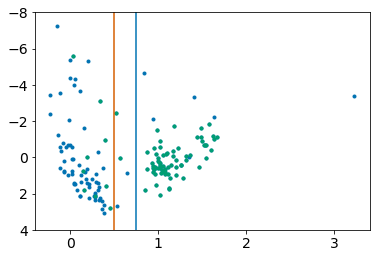

In [24]:
plt.plot(all_plot['b_v'],all_plot['abs_Vmag'],'.')
plt.plot(all_plot['b_v'][giants],all_plot['abs_Vmag'][giants],'.')

plt.ylim(4,-8)
plt.axvline(0.75)
plt.axvline(0.5,color=colours[2])

In [25]:
funny = (all_plot['b_v']<0.75)*(all_plot['b_v']>0.5)
all_plot[funny]

/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Name,EPIC,Vmag,Bmag,Campaign,parallax,SpType,abs_Vmag,b_v
str17,int64,float64,float64,str21,float64,str21,float64,float64
psi Sgr,200062584,4.85,5.409999847412109,7,10.93,K0/1III+A/F,0.04310080974851438,0.5599998474121097
42 Cet,200068399,5.87,6.510000228881836,8,9.93,G8IV+A(8),0.8547462424769057,0.6400002288818358
7 Sgr,200069362,5.34,5.860000133514404,9,2.8053,F2II-III,-2.4201034414191778,0.5200001335144044
zet Cnc,200233643,4.67,5.199999809265137,18,39.87,F8V+G0V,2.6732311783119727,0.5299998092651368


In [26]:
# psi Sgr is a giant
# 42 Cet is a subgiant
# 7 Sgr is a giant

In [27]:
Table(all_plot['Name','EPIC'][all_plot['b_v']>0.5]).write('halo_giants.csv')
Table(all_plot['Name','EPIC'][all_plot['b_v']<0.5]).write('halo_dwarfs.csv')


/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [28]:
tab.write('halo_giants.csv')

NameError: name 'tab' is not defined

In [29]:
all_plot.pprint(max_lines=500)

       Name          EPIC   ...        abs_Vmag                 b_v          
----------------- --------- ... --------------------- -----------------------
          Ascella 200062593 ...   0.42483453411577177     0.09999994277954105
         Albaldah 200062592 ...   -3.0891001300805643      0.3400000286102296
          tau Sgr 200062591 ...    0.5367364323672743      1.2000002288818359
         ksi2 Sgr 200062590 ...   -1.7357427055572678      1.1800000572204592
          omi Sgr 200062589 ...    0.5748594186296798      0.9999999809265137
           52 Sgr 200062585 ...    0.7756422345377443    -0.07000012207031236
        Ainalrami 200062588 ...    -3.330369831050123      1.4059999275207522
          psi Sgr 200062584 ...   0.04310080974851438      0.5599998474121097
           43 Sgr 200062587 ...   -0.9064281267294643      1.0169999809265136
          nu2 Sgr 200062586 ...   0.12566028739996504      1.3200001907348629
          eps Psc 200068392 ...     0.549112193540366      0.959